Pamietaj o memie its a cat z żabą na instagramie i o zabawie z mileną tym modelem


Importing and visualizing data <br>
Data augmentation <br>
transfer learning <br>
fine-tuning<br>
Training with resnet <br>
Training with image net <br>
training with mobile net <br>
Data evaluation

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import pandas as pd
import pathlib
import os

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image
import numpy as np

from tensorflow.keras.models import load_model

In [2]:
data_dir = pathlib.Path('data/train')
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

25000

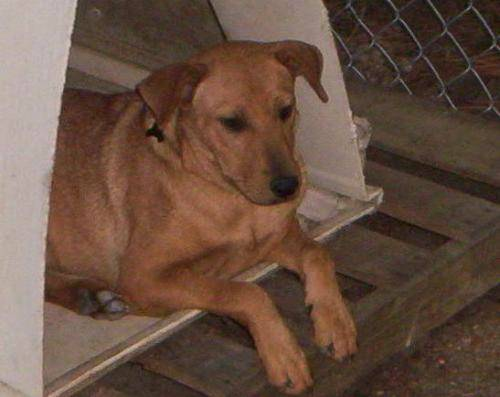

In [3]:
dogs = list(data_dir.glob('dog/*'))
PIL.Image.open(str(dogs[3]))

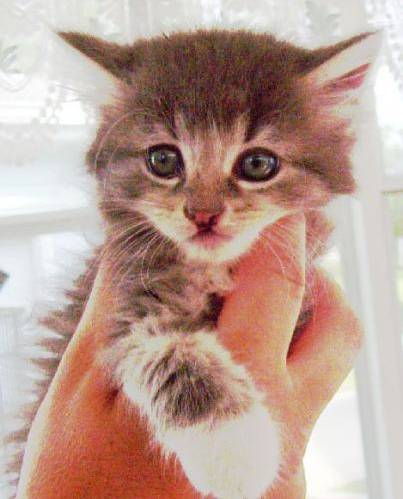

In [4]:
cats = list(data_dir.glob('cat/*'))
PIL.Image.open(str(cats[3]))

In [5]:
batch_size = 32
img_height = 180
img_width = 180

train_df = tf.keras.preprocessing.image_dataset_from_directory(
                                            data_dir,
                                            validation_split=0.2,
                                            subset='training',
                                            seed=8,
                                            image_size=(img_height, img_width),
                                            batch_size=batch_size)

Found 25000 files belonging to 2 classes.
Using 20000 files for training.


In [6]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=8,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 25000 files belonging to 2 classes.
Using 5000 files for validation.


In [7]:
class_names = train_df.class_names
class_names

['cat', 'dog']

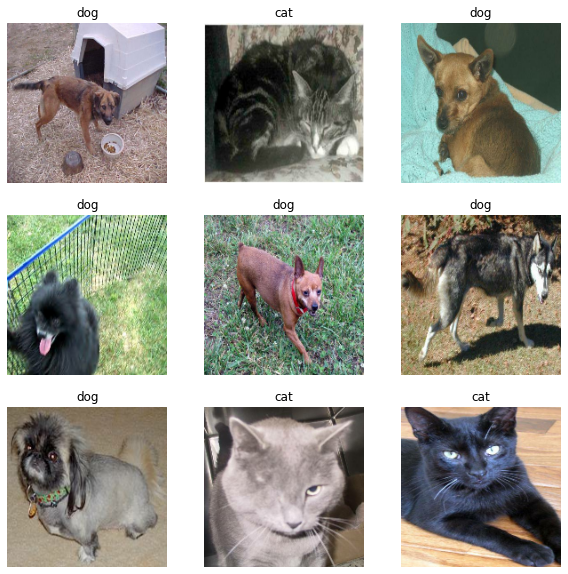

In [8]:
plt.figure(figsize=(10, 10))
for images, labels in train_df.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')

In [8]:
for image_batch, labels_batch in train_df:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 180, 180, 3)
(32,)


# Data preparation

In [9]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_df = train_df.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

In [10]:
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [11]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [13]:
normalized_df = train_df.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_df))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.0 0.8780129


In [11]:
num_classes = 2
model = Sequential([
    layers.experimental.preprocessing.Rescaling(1. / 255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

In [60]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [61]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_4 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
batch_normalization_9 (Batch (None, 180, 180, 16)      64        
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 90, 90, 32)        4640      
_________________________________________________________________
batch_normalization_10 (Batc (None, 90, 90, 32)       

In [62]:
epochs=10
history = model.fit(train_df,
                   validation_data=val_ds,
                   epochs=epochs)

Epoch 1/10
625/625 [==============================] - 576s 921ms/step - loss: 1.1661 - accuracy: 0.5972 - val_loss: 0.6821 - val_accuracy: 0.6912
Epoch 2/10
625/625 [==============================] - 623s 997ms/step - loss: 0.5022 - accuracy: 0.7474 - val_loss: 0.5772 - val_accuracy: 0.7238
Epoch 3/10
625/625 [==============================] - 588s 941ms/step - loss: 0.4168 - accuracy: 0.8079 - val_loss: 0.7175 - val_accuracy: 0.7010
Epoch 4/10
625/625 [==============================] - 585s 936ms/step - loss: 0.3551 - accuracy: 0.8396 - val_loss: 0.4788 - val_accuracy: 0.7820
Epoch 5/10
625/625 [==============================] - 581s 930ms/step - loss: 0.3015 - accuracy: 0.8667 - val_loss: 0.4397 - val_accuracy: 0.8236
Epoch 6/10
625/625 [==============================] - 588s 941ms/step - loss: 0.2641 - accuracy: 0.8810 - val_loss: 0.5221 - val_accuracy: 0.7928
Epoch 7/10
625/625 [==============================] - 586s 938ms/step - loss: 0.2256 - accuracy: 0.8991 - val_loss: 0.4117 -

In [63]:
model.save('model_without_augmentation.h5')

INFO:tensorflow:Assets written to: model_without_augmentation\assets


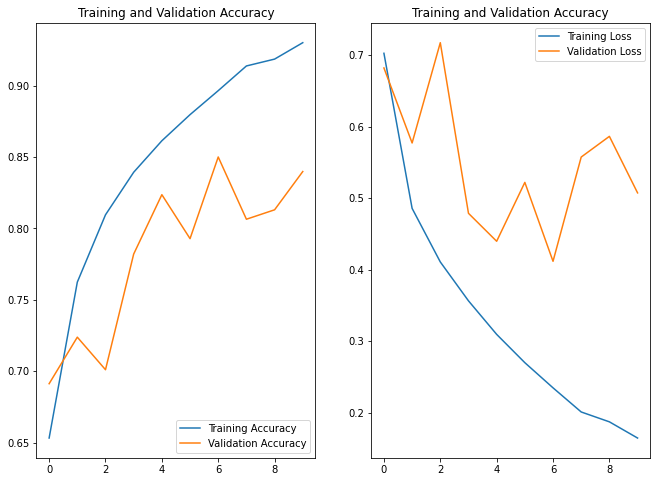

In [64]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(11, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Accuracy')

plt.show()

# Model with data augmentation

rotation <br>
brightness <br>
zoom <br>
flip <br>
channel shift <br>


In [49]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal',
                                                input_shape=(img_height,
                                                            img_width,
                                                            3)),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomZoom(0.1)
])

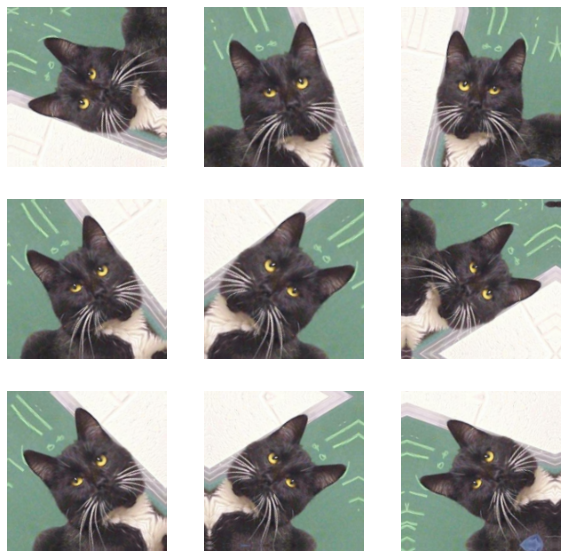

In [19]:
plt.figure(figsize=(10, 10))
for images, _ in train_df.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype('uint8'))
        plt.axis('off')

In [21]:
cp_callback_augmented = tf.keras.callbacks.ModelCheckpoint('augmented_cp.ckpt', save_weights_only=True)

In [24]:
model_with_augmentation = Sequential([
    data_augmentation,
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

In [26]:
model_with_augmentation.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [27]:
model_with_augmentation.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_2 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
batch_normalization_3 (Batch (None, 180, 180, 16)      64        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 90, 90, 32)       

In [28]:
epochs = 30
history = model_with_augmentation.fit(
    train_df,
    validation_data=val_ds,
    epochs=epochs, callbacks=[cp_callback_augmented]
)

Epoch 1/30
625/625 [==============================] - 661s 1s/step - loss: 1.6063 - accuracy: 0.6139 - val_loss: 0.5902 - val_accuracy: 0.6878
Epoch 2/30
625/625 [==============================] - 568s 908ms/step - loss: 0.5694 - accuracy: 0.6960 - val_loss: 0.5955 - val_accuracy: 0.6184
Epoch 3/30
625/625 [==============================] - 568s 909ms/step - loss: 0.5533 - accuracy: 0.7113 - val_loss: 0.5244 - val_accuracy: 0.7492
Epoch 4/30
625/625 [==============================] - 570s 911ms/step - loss: 0.5234 - accuracy: 0.7358 - val_loss: 0.5614 - val_accuracy: 0.7150
Epoch 5/30
625/625 [==============================] - 618s 988ms/step - loss: 0.5032 - accuracy: 0.7515 - val_loss: 0.5777 - val_accuracy: 0.7274
Epoch 6/30
625/625 [==============================] - 611s 977ms/step - loss: 0.4846 - accuracy: 0.7642 - val_loss: 0.5106 - val_accuracy: 0.7592
Epoch 7/30
625/625 [==============================] - 609s 974ms/step - loss: 0.4705 - accuracy: 0.7760 - val_loss: 0.4338 - va

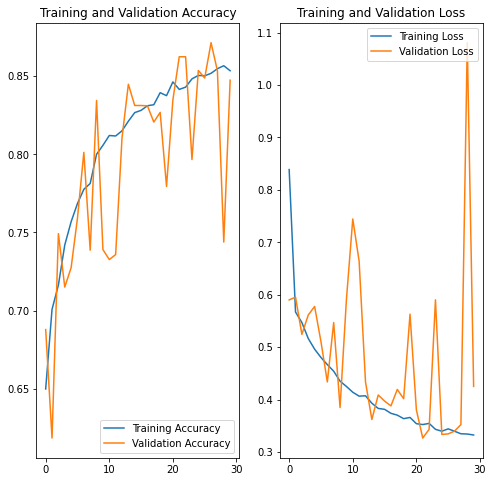

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [30]:
model_with_augmentation.save('model_with_augmentation.h5')

INFO:tensorflow:Assets written to: model_with_augmentation\assets


# Data augmentation with DataImageGenerator

In [14]:
model_augmented2 = Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(2, activation='softmax')
])

In [15]:
model_augmented2.compile(loss='categorical_crossentropy',
                        optimizer='rmsprop', metrics=['accuracy'])

In [17]:
model_augmented2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 178, 178, 32)      896       
_________________________________________________________________
batch_normalization_4 (Batch (None, 178, 178, 32)      128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 89, 89, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 89, 89, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 87, 87, 64)        18496     
_________________________________________________________________
batch_normalization_5 (Batch (None, 87, 87, 64)        256       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 43, 43, 64)       

In [37]:
earlystop = keras.callbacks.EarlyStopping(patience=10)
learning_rate_reduction = keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', patience=2, verbose=1, 
                                                            factor=0.5, min_lr=0.00001)
callbacks = [earlystop, learning_rate_reduction]

In [38]:
train_datagen = keras.preprocessing.image.ImageDataGenerator(rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1,
                              validation_split=0.2
                                )

In [39]:
train_generator = train_datagen.flow_from_directory(data_dir, target_size=(img_width, img_height),
                                                   subset='training')

Found 20000 images belonging to 2 classes.


In [40]:
validation_generator = train_datagen.flow_from_directory(data_dir, target_size=(img_width, img_height),
                                                   subset='validation')

Found 5000 images belonging to 2 classes.


In [41]:
epochs=10
history_aug2 = model_augmented2.fit_generator(train_generator,
                                  epochs=epochs,
                                  validation_data=validation_generator,
                                  callbacks=callbacks)

Epoch 1/10
625/625 [==============================] - 1161s 2s/step - loss: 0.4310 - accuracy: 0.8044 - val_loss: 0.6066 - val_accuracy: 0.7534
Epoch 2/10
625/625 [==============================] - 1182s 2s/step - loss: 0.4102 - accuracy: 0.8122 - val_loss: 0.5036 - val_accuracy: 0.7574
Epoch 3/10
625/625 [==============================] - 1173s 2s/step - loss: 0.3844 - accuracy: 0.8297 - val_loss: 0.4568 - val_accuracy: 0.7898
Epoch 4/10
625/625 [==============================] - 1171s 2s/step - loss: 0.3718 - accuracy: 0.8358 - val_loss: 0.6356 - val_accuracy: 0.6058
Epoch 5/10
625/625 [==============================] - 1123s 2s/step - loss: 0.3546 - accuracy: 0.8465 - val_loss: 0.3928 - val_accuracy: 0.8262
Epoch 6/10
625/625 [==============================] - 1095s 2s/step - loss: 0.3365 - accuracy: 0.8511 - val_loss: 0.8508 - val_accuracy: 0.7330
Epoch 7/10
625/625 [==============================] - 1086s 2s/step - loss: 0.3313 - accuracy: 0.8591 - val_loss: 0.3338 - val_accuracy:

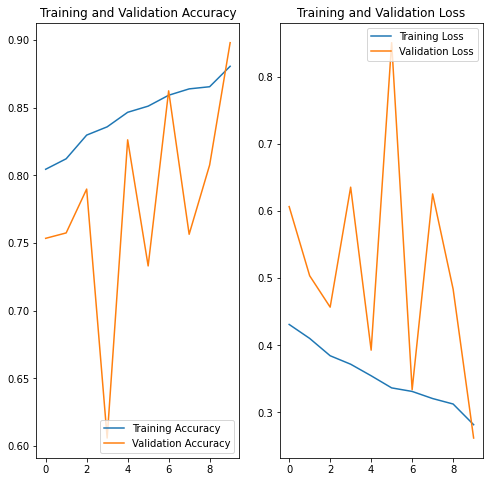

In [42]:
acc = history_aug2.history['accuracy']
val_acc = history_aug2.history['val_accuracy']

loss = history_aug2.history['loss']
val_loss = history_aug2.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [43]:
model_augmented2.save('model_augmented2.h5')

INFO:tensorflow:Assets written to: model_augmented2\assets


# Transfer learning 

In [46]:
base_model_mobile = keras.applications.MobileNetV2(input_shape=(180, 180, 3), include_top=False,
                                                  weights='imagenet')
base_model_mobile.trainable = False

9412608/9406464 [==============================] - 4s 0us/step


In [47]:
global_average_layer = keras.layers.GlobalAveragePooling2D()

In [52]:
model_transfer_mobile = Sequential([
    data_augmentation,
    keras.layers.experimental.preprocessing.Rescaling(1./127.5, offset= -1),
    base_model_mobile,
    global_average_layer,
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2, activation='softmax')
])

In [53]:
model_transfer_mobile.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                             metrics=['accuracy'])

In [54]:
model_transfer_mobile.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_2 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
mobilenetv2_1.00_224 (Functi (None, 6, 6, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 2562      
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
________________________________________

In [56]:
history_transfer_mobile = model_transfer_mobile.fit(train_df,
                                                   epochs=epochs,
                                                   validation_data=val_ds)

Epoch 1/10
625/625 [==============================] - 338s 493ms/step - loss: 0.2416 - accuracy: 0.8960 - val_loss: 0.0513 - val_accuracy: 0.9810
Epoch 2/10
625/625 [==============================] - 309s 494ms/step - loss: 0.1378 - accuracy: 0.9481 - val_loss: 0.0508 - val_accuracy: 0.9822
Epoch 3/10
625/625 [==============================] - 310s 497ms/step - loss: 0.1359 - accuracy: 0.9477 - val_loss: 0.0492 - val_accuracy: 0.9826
Epoch 4/10
625/625 [==============================] - 309s 495ms/step - loss: 0.1248 - accuracy: 0.9526 - val_loss: 0.0485 - val_accuracy: 0.9818
Epoch 5/10
625/625 [==============================] - 310s 496ms/step - loss: 0.1265 - accuracy: 0.9504 - val_loss: 0.0639 - val_accuracy: 0.9786
Epoch 6/10
625/625 [==============================] - 308s 494ms/step - loss: 0.1291 - accuracy: 0.9502 - val_loss: 0.0493 - val_accuracy: 0.9824
Epoch 7/10
625/625 [==============================] - 311s 498ms/step - loss: 0.1301 - accuracy: 0.9503 - val_loss: 0.0691 -

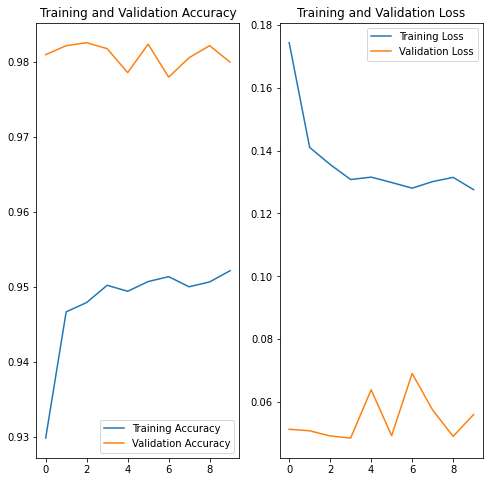

In [57]:
acc = history_transfer_mobile.history['accuracy']
val_acc = history_transfer_mobile.history['val_accuracy']

loss = history_transfer_mobile.history['loss']
val_loss = history_transfer_mobile.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Fine-tuning mobilenet

In [58]:
base_model_mobile.trainable = True

In [59]:
print("Number of layers in the base model: ", len(base_model_mobile.layers))

Number of layers in the base model:  154


In [62]:
fine_tune_at = 100

In [63]:
for layer in base_model_mobile.layers[:fine_tune_at]:
    layer.trainable =  False

In [66]:
model_transfer_mobile.compile(optimizer=keras.optimizers.RMSprop(lr=0.000001), 
                              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                                                                metrics=['accuracy'])

In [67]:
model_transfer_mobile.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_2 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
mobilenetv2_1.00_224 (Functi (None, 6, 6, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 2562      
Total params: 2,260,546
Trainable params: 1,864,002
Non-trainable params: 396,544
______________________________________

In [70]:
fine_tune_epochs = 10
total_epochs =  epochs + fine_tune_epochs

history_transfer_mobile_fine = model_transfer_mobile.fit(train_df,
                         epochs=total_epochs,
                         initial_epoch=history_transfer_mobile.epoch[-1],
                         validation_data=val_ds)

Epoch 10/20
625/625 [==============================] - 577s 917ms/step - loss: 0.4859 - accuracy: 0.8023 - val_loss: 0.1076 - val_accuracy: 0.9642
Epoch 11/20
625/625 [==============================] - 602s 963ms/step - loss: 0.2488 - accuracy: 0.8925 - val_loss: 0.0972 - val_accuracy: 0.9656
Epoch 12/20
625/625 [==============================] - 586s 938ms/step - loss: 0.2061 - accuracy: 0.9138 - val_loss: 0.0804 - val_accuracy: 0.9698
Epoch 13/20
625/625 [==============================] - 594s 951ms/step - loss: 0.1905 - accuracy: 0.9215 - val_loss: 0.0710 - val_accuracy: 0.9732
Epoch 14/20
625/625 [==============================] - 598s 958ms/step - loss: 0.1842 - accuracy: 0.9254 - val_loss: 0.0669 - val_accuracy: 0.9758
Epoch 15/20
625/625 [==============================] - 645s 1s/step - loss: 0.1746 - accuracy: 0.9271 - val_loss: 0.0634 - val_accuracy: 0.9764
Epoch 16/20
625/625 [==============================] - 654s 1s/step - loss: 0.1706 - accuracy: 0.9330 - val_loss: 0.0623 

In [72]:
acc += history_transfer_mobile_fine.history['accuracy']
val_acc += history_transfer_mobile_fine.history['val_accuracy']


loss += history_transfer_mobile_fine.history['loss']
val_loss += history_transfer_mobile_fine.history['val_loss']

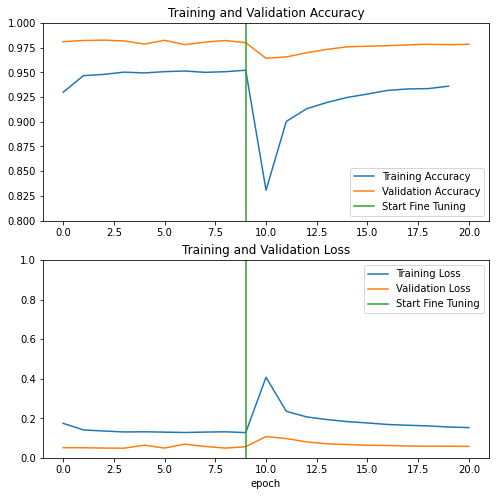

In [77]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([epochs-1,epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([epochs-1,epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [100]:
model_transfer_mobile.save('model_transfer_mobile_fine.h5')

# Preparing testing data

In [82]:
test_data_dir = pathlib.Path('data/test')

test_filenames = os.listdir(test_data_dir)
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

In [85]:
test_gen = keras.preprocessing.image.ImageDataGenerator()
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    test_data_dir, 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    shuffle=False
)

Found 12500 validated image filenames.


In [92]:
preds = model_transfer_mobile.predict_generator(test_generator,  steps=np.ceil(nb_samples/batch_size))

# Creating app

In [2]:
tk_model = load_model('model_transfer_mobile_fine.h5')

In [ ]:
classes = {
    0:"it's a cat",
    1:"it's a dog"
}

top = tk.Tk()
top.geometry('800x600')
top.title('CatsVsDogs Classification')
top.configure(background='#CDCDCD')
label = Label(top, background='#CDCDCD', font=('arial', 15, 'bold'))
sign_image = Label(top)

def classify(file_path):
    image = Image.open(file_path)
    image = image.resize((180, 180))
    image = np.expand_dims(image, 0)
    image = np.array(image)
    pred = np.argmax(tk_model.predict(image), axis=-1)[0]
    sign = classes[pred]
    label.configure(foreground='#011638', text=sign)
    
def show_classify_button(file_path):
    classify_b=Button(top,text="Classify Image",
   command=lambda: classify(file_path),
   padx=10,pady=5)
    classify_b.configure(background='#364156', foreground='white',
                            font=('arial',10,'bold'))
    classify_b.place(relx=0.79,rely=0.46)
    
def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/2.25),
    (top.winfo_height()/2.25)))
        im=ImageTk.PhotoImage(uploaded)
        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass
    
upload=Button(top, text='Upload an image', command=upload_image, padx=10, pady=5)
upload.configure(background='#364156', foreground='white', font=('arial', 10, 'bold'))
upload.pack(side=BOTTOM, pady=50)
sign_image.pack(side=BOTTOM, pady=50)
label.pack(side=BOTTOM, expand=True)
heading = Label(top, text='CatsVsDogs Classification', pady=20, font=('arial', 20, 'bold'))
heading.configure(background='#CDCDCD', foreground='#364156')
heading.pack()

top.mainloop()

#  Bibliografia

https://towardsdatascience.com/wtf-is-image-classification-8e78a8235acb introduction to cnn